<a href="https://colab.research.google.com/github/Rend-Yaser/EMG_FINAL_PROJECT.ipynb/blob/main/EMG_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libs

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,svm,datasets
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


#  Load Kaggle Datasets

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download sojanprajapati/emg-signal-for-gesture-recognition

emg-signal-for-gesture-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


#Read CSV file into a DataFrame

In [ ]:

! unzip /content/emg-signal-for-gesture-recognition.zip

Archive:  /content/emg-signal-for-gesture-recognition.zip
replace EMG-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('/content/EMG-data.csv')
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


#preprocessing steps

In [ ]:
df['class'].value_counts()

0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64

In [ ]:
df=df.drop(columns=['label','time'])
df

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
...,...,...,...,...,...,...,...,...,...
4237902,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0
4237903,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0
4237904,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0
4237905,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0


In [ ]:
df1=df.sample(frac = 1).loc[df['class'] == 0]
df1


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
2017965,-0.00001,-0.00005,-0.00001,-0.00002,-0.00001,-0.00002,0.00000,-0.00001,0
872242,-0.00002,-0.00003,0.00001,-0.00002,0.00000,0.00001,-0.00003,-0.00002,0
1427198,-0.00003,0.00000,-0.00001,0.00003,0.00003,-0.00007,-0.00010,-0.00005,0
964763,0.00000,0.00001,-0.00004,-0.00008,-0.00002,0.00001,0.00000,-0.00001,0
416644,0.00002,0.00008,0.00015,-0.00019,0.00000,0.00005,0.00000,-0.00006,0
...,...,...,...,...,...,...,...,...,...
4123301,0.00059,0.00076,0.00008,0.00004,0.00028,-0.00030,-0.00020,0.00006,0
3378871,-0.00001,0.00000,-0.00002,-0.00003,-0.00003,0.00001,0.00001,-0.00002,0
676763,-0.00001,0.00000,0.00009,0.00040,0.00072,0.00048,0.00010,0.00007,0
444063,-0.00101,0.00005,0.00019,-0.00060,-0.00048,-0.00011,-0.00006,-0.00027,0


In [ ]:
df1=df1.drop(index=df1.index[:2475000], 
        axis=0 
       )
df1

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
671366,-0.00003,-0.00002,-0.00002,-0.00002,-0.00002,0.00000,-0.00001,-0.00001,0
3720221,-0.00002,0.00001,0.00005,0.00013,0.00021,-0.00008,-0.00002,0.00000,0
1062040,-0.00002,-0.00001,0.00000,-0.00004,-0.00005,0.00001,-0.00003,-0.00002,0
2702608,0.00001,0.00003,-0.00008,-0.00015,-0.00025,0.00000,-0.00005,0.00000,0
1521551,0.00007,0.00007,0.00010,0.00031,-0.00045,0.00016,0.00010,0.00006,0
...,...,...,...,...,...,...,...,...,...
4123301,0.00059,0.00076,0.00008,0.00004,0.00028,-0.00030,-0.00020,0.00006,0
3378871,-0.00001,0.00000,-0.00002,-0.00003,-0.00003,0.00001,0.00001,-0.00002,0
676763,-0.00001,0.00000,0.00009,0.00040,0.00072,0.00048,0.00010,0.00007,0
444063,-0.00101,0.00005,0.00019,-0.00060,-0.00048,-0.00011,-0.00006,-0.00027,0


In [ ]:
df=df.drop(df.loc[df['class']==0].index)
df=df.drop(df.loc[df['class']==7].index)
df

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
...,...,...,...,...,...,...,...,...,...
4237207,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
4237208,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
4237209,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
4237210,0.00014,0.00003,-0.00001,0.00001,-0.00012,0.00006,-0.00007,-0.00013,6


In [ ]:
df = df.append(df1, ignore_index = False)
df

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1
...,...,...,...,...,...,...,...,...,...
4123301,0.00059,0.00076,0.00008,0.00004,0.00028,-0.00030,-0.00020,0.00006,0
3378871,-0.00001,0.00000,-0.00002,-0.00003,-0.00003,0.00001,0.00001,-0.00002,0
676763,-0.00001,0.00000,0.00009,0.00040,0.00072,0.00048,0.00010,0.00007,0
444063,-0.00101,0.00005,0.00019,-0.00060,-0.00048,-0.00011,-0.00006,-0.00027,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00cd6c950>]],
      dtype=object)

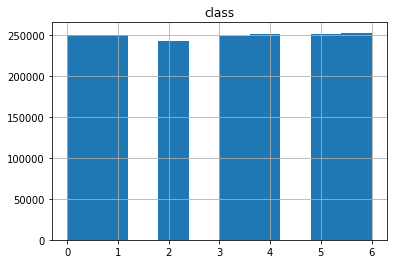

In [ ]:
df.hist('class')

In [ ]:
df['class'].value_counts()

6    253009
5    251733
4    251570
0    250157
1    250055
3    249494
2    243193
Name: class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749211 entries, 2287 to 246857
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   channel1  float64
 1   channel2  float64
 2   channel3  float64
 3   channel4  float64
 4   channel5  float64
 5   channel6  float64
 6   channel7  float64
 7   channel8  float64
 8   class     int64  
dtypes: float64(8), int64(1)
memory usage: 133.5 MB


In [ ]:
df.describe()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06,1.749211e+06
mean,-8.064196e-06,-9.586316e-06,-9.583824e-06,-9.467383e-06,-1.828490e-05,-1.156832e-05,-9.797234e-06,-1.030606e-05,3.011599e+00
std,1.838080e-04,1.332797e-04,1.351131e-04,2.563703e-04,3.066564e-04,2.418638e-04,1.717851e-04,1.942156e-04,2.004758e+00
min,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,0.000000e+00
25%,-5.000000e-05,-4.000000e-05,-5.000000e-05,-8.000000e-05,-1.200000e-04,-9.000000e-05,-5.000000e-05,-5.000000e-05,1.000000e+00
50%,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,3.000000e+00
75%,3.000000e-05,2.000000e-05,3.000000e-05,6.000000e-05,8.000000e-05,6.000000e-05,3.000000e-05,3.000000e-05,5.000000e+00
max,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,6.000000e+00


In [ ]:

x=df.iloc[:,:8]
x #features

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
...,...,...,...,...,...,...,...,...
4123301,0.00059,0.00076,0.00008,0.00004,0.00028,-0.00030,-0.00020,0.00006
3378871,-0.00001,0.00000,-0.00002,-0.00003,-0.00003,0.00001,0.00001,-0.00002
676763,-0.00001,0.00000,0.00009,0.00040,0.00072,0.00048,0.00010,0.00007
444063,-0.00101,0.00005,0.00019,-0.00060,-0.00048,-0.00011,-0.00006,-0.00027


In [ ]:
y= df[['class']].to_numpy() #target
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

##Normalization

In [ ]:
x_normalizer=preprocessing.StandardScaler()

x_norm=x_normalizer.fit_transform(x)


##train_test_split

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.05,random_state=42)

#KNN

##Creating Model

In [ ]:
#Create a knn Classifier
knn= KNeighborsClassifier(n_neighbors=10)
#Train the model using the training sets
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Predict the response for test dataset
y_pred = knn.predict(x_test)

##Evaluating Model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8813070968774653
recall_score :  0.8813070968774653
Precision Score :  0.8770974517133585
f1_score :  0.8689082804560048


##plot confusion matrix

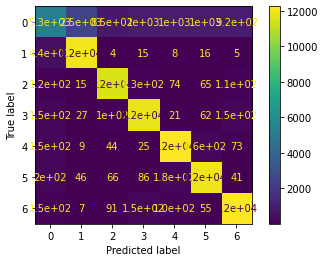

In [ ]:
#plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test)
plt.show()

#DecisionTreeClassifier

##Creating Model

In [ ]:
#Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()
#Train the model using the training sets
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

##Evaluating Model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9569065069002184
recall_score :  0.9569065069002184
Precision Score :  0.9564167423655069
f1_score :  0.9565030901720019


##plot confusion matrix

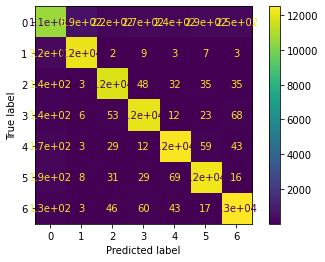

In [ ]:
#plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)
plt.show()

#RandomForestClassifier (the best model)

##Creating Model

In [ ]:
#Create a RandomForestClassifier
rf= RandomForestClassifier()
#Train the model using the training sets
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predict the response for test dataset
y_pred = rf.predict(x_test)

##Evaluating Model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.966522221332937
recall_score :  0.966522221332937
Precision Score :  0.9664939000891307
f1_score :  0.9664982873436829


##plot confusion matrix

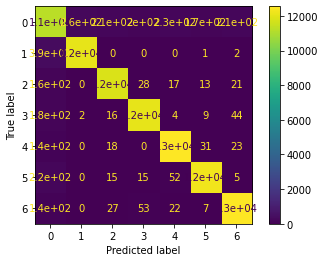

In [ ]:
#plot_confusion_matrix
plot_confusion_matrix(rf,x_test,y_test)
plt.show()

#DNN

##DNN preprocessing step

In [ ]:
Y=df['class'] #dnn target
Y

2287       1
2288       1
2289       1
2290       1
2291       1
          ..
4123301    0
3378871    0
676763     0
444063     0
246857     0
Name: class, Length: 1749211, dtype: int64

##DNN Train/Test/Validation Splitting

In [ ]:
x_train,x_test,Y_train,Y_test=model_selection.train_test_split(x_norm,Y,test_size=0.05,random_state=42)  #train_test_split

In [ ]:
x_train, x_val, Y_train, Y_val =train_test_split(x_train, Y_train, test_size=0.05, random_state=42)     #train_val_split

##one-hot encodeing

In [ ]:

#convert the labels to one-hot vector for Y_train and Y_test and Y_val using one-hot encodeing
Y_train_hot=tf.one_hot(Y_train,depth=len(set(Y_train)))
Y_test_hot=tf.one_hot(Y_test,depth=len(set(Y_train)))
Y_val_hot=tf.one_hot(Y_val,depth=len(set(Y_train)))

In [ ]:
tf.keras.backend.clear_session()

##creat a Sequentail model

In [ ]:
#creat a Sequentail model using keras
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(8,)),
                                  tf.keras.layers.Dense(units=64,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  
                                  tf.keras.layers.Dense(units=512,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_3'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_4'),
                                 
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_5'),
                                  
                                  tf.keras.layers.Dense(units=7,activation=tf.nn.softmax,name='output')
])

In [ ]:
#show the model info
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 64)                576       
_________________________________________________________________
layer_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
layer_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
layer_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
layer_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 7)                 9

In [ ]:
#compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
#train the model with batch_size=128,for 150 epochs
model.fit(x=x_train,y=Y_train_hot,batch_size=128,epochs=150,validation_data=(x_val,Y_val_hot))

Epoch 1/150
12334/12334 [==============================] - 53s 4ms/step - loss: 1.1260 - acc: 0.5682 - val_loss: 1.0721 - val_acc: 0.5858
Epoch 2/150
12334/12334 [==============================] - 53s 4ms/step - loss: 1.0624 - acc: 0.5906 - val_loss: 1.0495 - val_acc: 0.5950
Epoch 3/150
12334/12334 [==============================] - 52s 4ms/step - loss: 1.0342 - acc: 0.6019 - val_loss: 1.0135 - val_acc: 0.6094
Epoch 4/150
12334/12334 [==============================] - 52s 4ms/step - loss: 1.0101 - acc: 0.6112 - val_loss: 0.9918 - val_acc: 0.6178
Epoch 5/150
12334/12334 [==============================] - 52s 4ms/step - loss: 0.9871 - acc: 0.6206 - val_loss: 0.9647 - val_acc: 0.6283
Epoch 6/150
12334/12334 [==============================] - 52s 4ms/step - loss: 0.9664 - acc: 0.6293 - val_loss: 0.9430 - val_acc: 0.6383
Epoch 7/150
12334/12334 [==============================] - 52s 4ms/step - loss: 0.9465 - acc: 0.6378 - val_loss: 0.9247 - val_acc: 0.6500
Epoch 8/150
12334/12334 [=========

##plot hist 

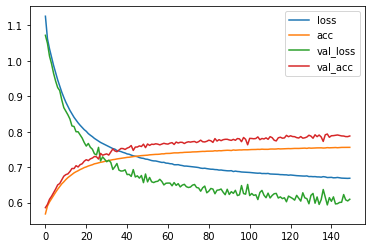

In [ ]:
hist_df=pd.DataFrame(model.history.history)
hist_df.plot()

##test the model on the test dataset 

In [ ]:
#test the model on the test dataset 
pred=model.predict(x_test)

In [ ]:
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(87461,), dtype=int64, numpy=array([2, 1, 5, ..., 6, 5, 3])>

In [ ]:
Y_test

38266      2
818584     0
4232562    5
3105870    3
3472742    1
          ..
887687     3
3918352    3
2778939    6
2450242    5
2311381    3
Name: class, Length: 87461, dtype: int64

##Evaluating Model


In [ ]:
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(Y_test_hot,pred))
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.categorical_crossentropy(Y_test_hot,pred))
print('loss:',loss)
pr=metrics.precision_score(Y_test,np.argmax(pred,-1),average='weighted')
print('pr:',pr)
re=metrics.recall_score(Y_test,np.argmax(pred,-1),average='weighted')
print('re:',re)
f1 =metrics.f1_score(Y_test,np.argmax(pred,-1),average='weighted')
print('f1:',f1)

confusion_matrix=metrics.confusion_matrix(Y_test,np.argmax(pred,-1))

acc: tf.Tensor(0.7931078, shape=(), dtype=float32)
loss: tf.Tensor(0.59889054, shape=(), dtype=float32)
pr: 0.769762678486572
re: 0.7931077851842535
f1: 0.7667357108325665


## plot confusion matrix

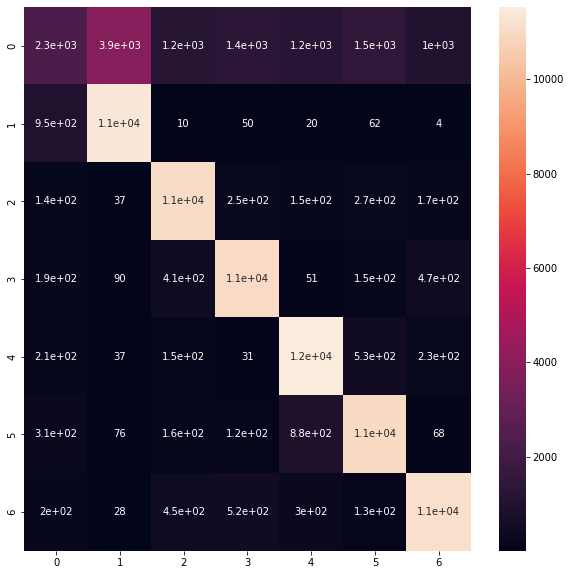

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True,)